## Histogram Function and Multivariate Graphs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors 

%config InlineBackend.figure_format = 'retina'

In [45]:
def set_spines(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)

In [2]:
df_cars = pd.read_csv("data/cars.csv")
df_cars.head()

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


In [3]:
# Get average miles per gallon for each car with the same number of cylinders
avg_mpg = df_cars.groupby('CYL').mean()['MPG']
avg_wgt = df_cars.groupby('CYL').mean()['WGT'] # do the same for average weight

# Get average miles per gallon for each car with the same weight
avg_mpg_per_wgt = df_cars.groupby('WGT').mean()['MPG']
# Get the unique list of cylinders in numerical order
cyl = sorted(df_cars['CYL'].unique())

# Get a list of all mpg values for three specific cylinder sizes
cyl4 = df_cars[df_cars['CYL']==4]['MPG'].values
cyl6 = df_cars[df_cars['CYL']==6]['MPG'].values
cyl8 = df_cars[df_cars['CYL']==8]['MPG'].values

### Exercise 1

1. Given the following data, plot two curves and choose different colors for each
```
x = np.linspace(0,10,num=100)
y1 = 3*np.sin(x)
y2 = np.cos(3*x)
```
1. Label the X axis as "X" and Y axis as "Amplitude"

In [43]:
x = np.linspace(0,10,num=100)
y1 = 3*np.sin(x)
y2 = np.cos(3*x)

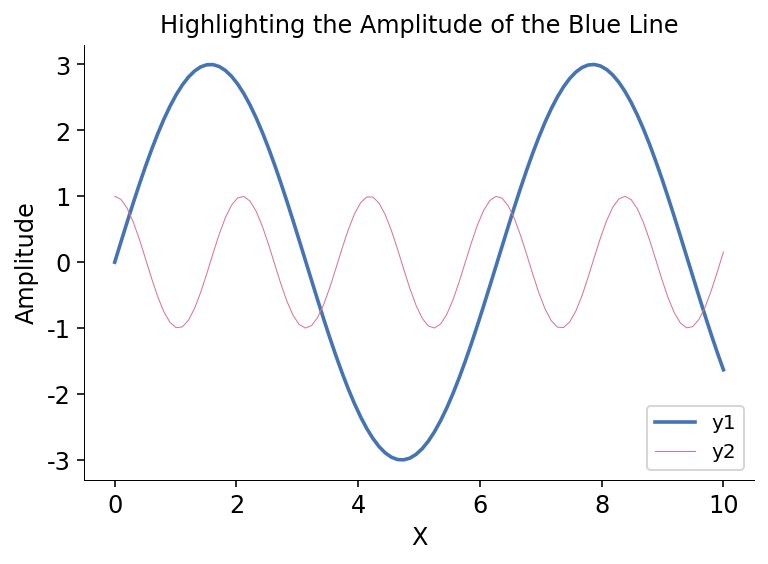

In [46]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, y1, lw=1.8, c='#4574B4', label = 'y1')
ax.plot(x, y2, lw=0.5, c='palevioletred', label = 'y2')
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Amplitude', fontsize =12)
ax.set_yticklabels(range(-4,4), fontsize=12)
ax.set_xticklabels(range(-2,12,2), fontsize=12)
ax.set_title('Highlighting the Amplitude of the Blue Line')

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_linewidth(0.5)
# ax.spines['bottom'].set_linewidth(0.5)

set_spines(ax)

plt.legend(loc='lower right')
plt.show()

### Exercise 2

1. Draw another scatterplot but this time showing `df_cars['ENG']` vs `df_cars['MPG']` and set the dot size to be related to `df_cars['CYL']` again.
1. Set the color to indicate `df_cars['WGT']`.
1. Try using different `cmap` [colormap parameters](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html).

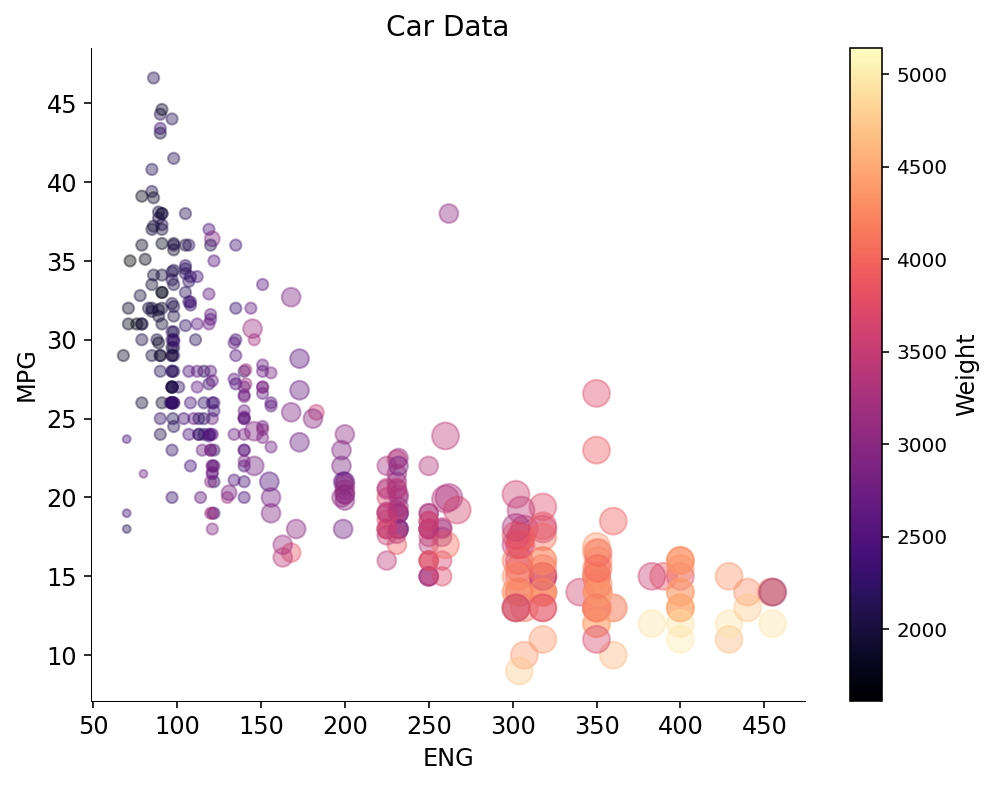

In [47]:
fig, ax = plt.subplots(figsize=(8,6))

cmap = plt.get_cmap('magma')

norm = colors.Normalize(df_cars['WGT'].min(), df_cars['WGT'].max())
normed=norm(df_cars['WGT'])
color = cmap(normed)
color[0:5]

cmap = plt.cm.magma
p = ax.scatter(df_cars['ENG'],df_cars['MPG'],
           color= color,alpha=.4, s=df_cars['CYL']**2.5, cmap=color)

cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))
cbar.set_label('Weight', fontsize=12)

set_spines(ax)
ax.set_xlabel('ENG', fontsize = 12)
ax.set_ylabel('MPG', fontsize = 12)

ax.set_title('Car Data', fontsize=14)

for tick in ax.get_xticklabels():
    tick.set_fontsize(12)
for tick in ax.get_yticklabels():
    tick.set_fontsize(12)
    
plt.show()

### Exercise 3

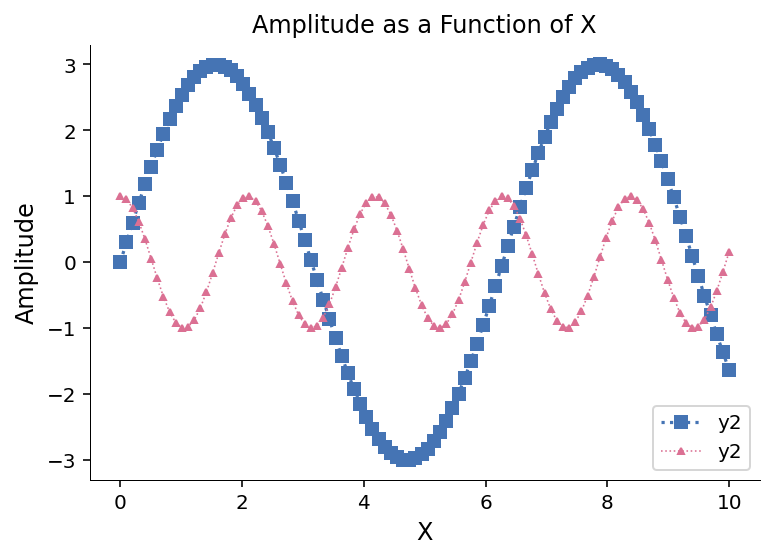

In [7]:
x = np.linspace(0,10,num=100)
y1 = 3*np.sin(x)
y2 = np.cos(3*x)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, y1, ':s', lw=1.6, c='#4574B4', label = 'y2')
ax.plot(x, y2,':^', lw=0.8, markersize= 3, c='palevioletred', label = 'y2')
ax.set_xlabel('X', fontsize= 12)
ax.set_ylabel('Amplitude', fontsize=12)
ax.set_title('Amplitude as a Function of X')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)


plt.legend(loc='lower right')
plt.show()

### Exercise 4

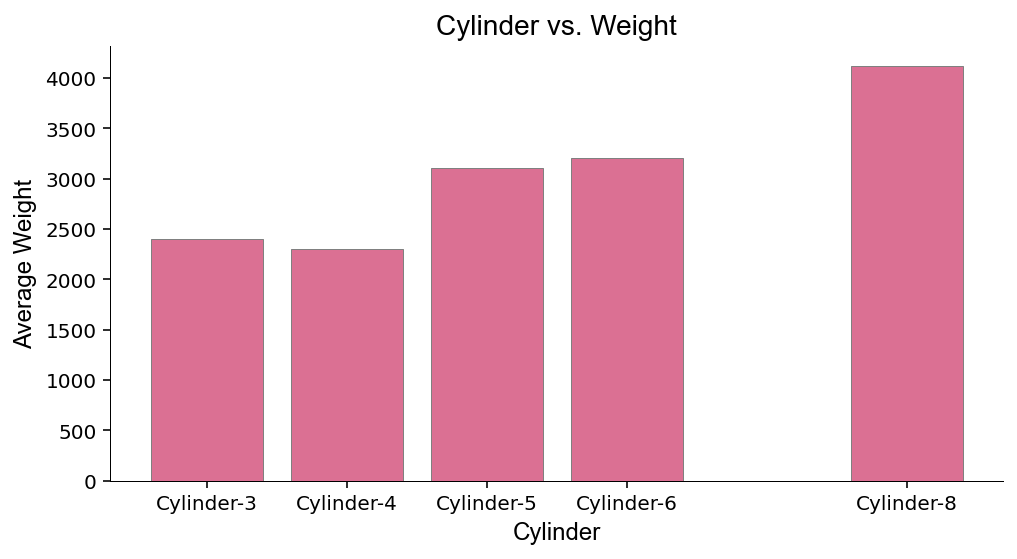

In [8]:
fig, ax = plt.subplots(figsize = (8,4))

barcontainers = ax.bar(cyl, avg_wgt, color = 'palevioletred')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

ax.set_xlabel('Cylinder', fontsize=12, fontname = 'Arial')
ax.set_ylabel('Average Weight', fontsize=12, fontname = 'Arial')
ax.set_title('Cylinder vs. Weight', fontsize=14, fontname = 'Arial')

for rect in barcontainers.patches:
    rect.set_linewidth(0.5)
    rect.set_edgecolor('grey')
    
ax.set_xticks(cyl)
ax.set_xticklabels([f'Cylinder-{n}' for n in cyl])

plt.show()

## Text

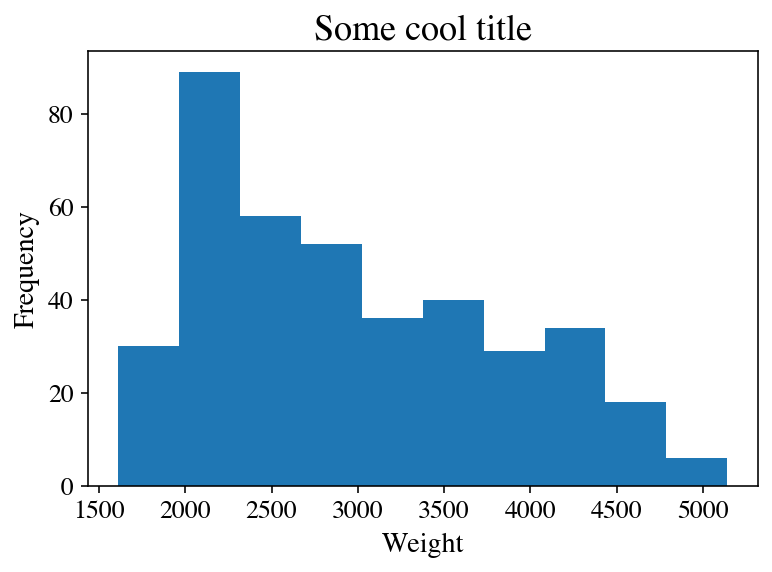

In [9]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(df_cars['WGT'])
ax.set_xlabel('Weight', fontsize=14, fontname= 'Times')
ax.set_ylabel('Frequency',fontsize=14, fontname = 'Times')
ax.set_title('Some cool title', fontsize=18, fontname='Times')

#ax.set_xticks([2000,4000]) 
#ax.set_xlim(0,10000) Changing bounds on graph to expand

for tick in ax.get_xticklabels():
    tick.set_fontname('Times')
    tick.set_fontsize(13)

for tick in ax.get_yticklabels():
    tick.set_fontname('Times')
    tick.set_fontsize(13)
    
plt.show()

## Color

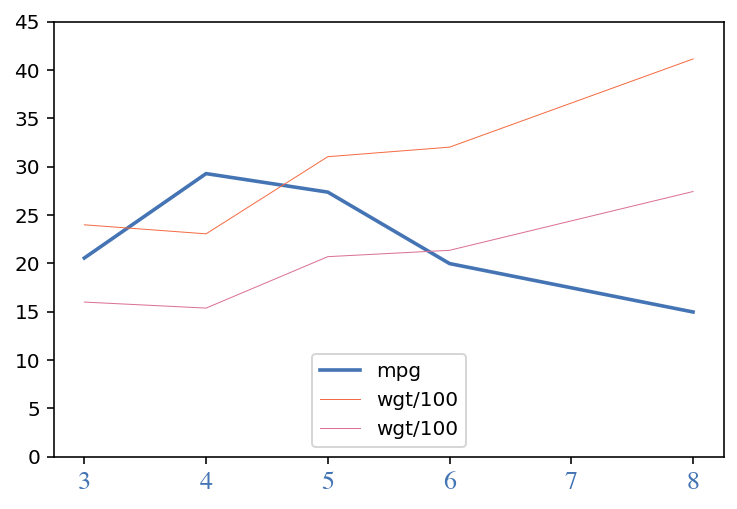

In [10]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(cyl, avg_mpg, lw=1.8, c='#4574B4', label = 'mpg')
ax.plot(cyl, avg_wgt/100, lw=0.5, c='#F46C43', label = 'wgt/100')
ax.plot(cyl, avg_wgt/150, lw = 0.5, c='palevioletred', label = 'wgt/100')
ax.set_ylim(0,45)

for tick in ax.get_xticklabels():
    tick.set_fontname('Times')
    tick.set_fontsize(13)
    tick.set_color('#4374B4')
    
plt.legend(loc='lower center')
plt.show()

## Playing with Scatterplots

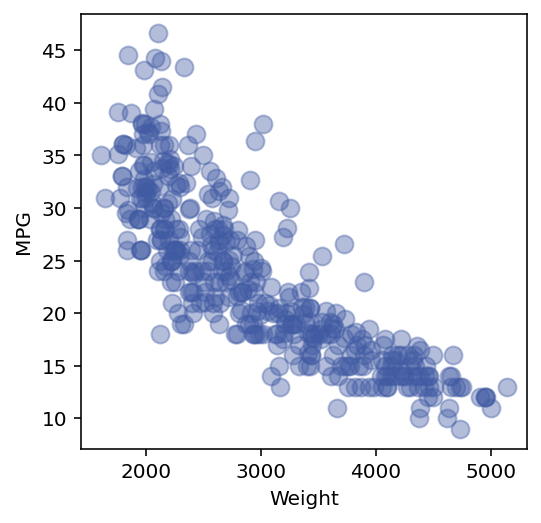

In [11]:
fig, ax = plt.subplots(figsize=(4,4))

#border of the dots being darker helps us see the contrast and density
ax.scatter(df_cars['WGT'],df_cars['MPG'], color= '#415BA3',alpha=.4, s=80)
ax.set_xlabel('Weight')
ax.set_ylabel('MPG')
plt.show()

In [12]:
cmap = plt.get_cmap('coolwarm')
cmap(0.0), cmap(1.0) #displays red, green, blue and alpha

((0.2298057, 0.298717966, 0.753683153, 1.0),
 (0.705673158, 0.01555616, 0.150232812, 1.0))

In [13]:
df_cars['MPG'].max()

46.599998

In [14]:
norm = colors.Normalize(df_cars['MPG'].min(), df_cars['MPG'].max())

In [15]:
#normalizing values in MPG column to be between 0 and 1
normed = norm(df_cars['MPG'])
ycolor = cmap(normed)
ycolor[0:5]

array([[0.53800422, 0.67490159, 0.99172189, 1.        ],
       [0.42519897, 0.55905818, 0.94606146, 1.        ],
       [0.53800422, 0.67490159, 0.99172189, 1.        ],
       [0.4623544 , 0.59983011, 0.96585719, 1.        ],
       [0.50003056, 0.63850847, 0.98107012, 1.        ]])

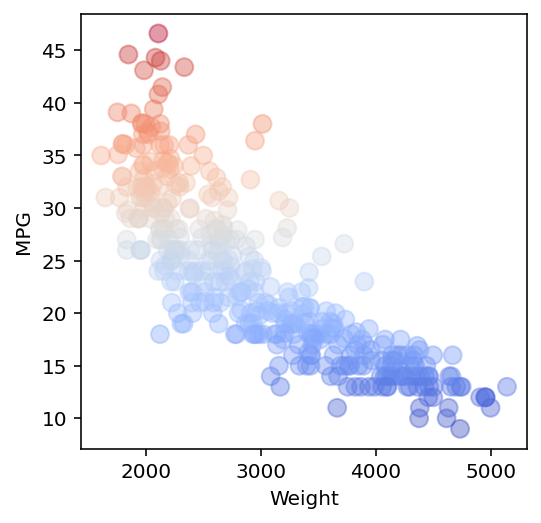

In [16]:
fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(df_cars['WGT'],df_cars['MPG'], color= ycolor,alpha=.4, s=80)
ax.set_xlabel('Weight')
ax.set_ylabel('MPG')
plt.show()

In [17]:
#normalizing values in MPG column to be between 0 and 1
norm = colors.Normalize(df_cars['WGT'].min(), df_cars['WGT'].max())
normed = norm(df_cars['WGT'])
xcolor = cmap(normed)
xcolor[0:5]

array([[0.90284867, 0.84479565, 0.81196983, 1.        ],
       [0.94087894, 0.8055964 , 0.73516656, 1.        ],
       [0.88368714, 0.85610772, 0.84025767, 1.        ],
       [0.88368714, 0.85610772, 0.84025767, 1.        ],
       [0.88775202, 0.8540405 , 0.83467147, 1.        ]])

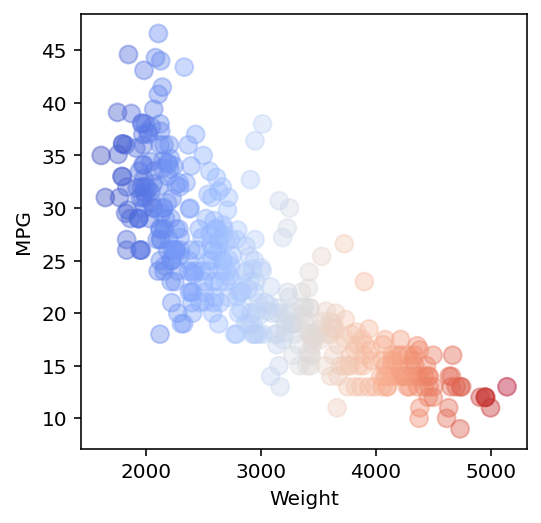

In [18]:
fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(df_cars['WGT'],df_cars['MPG'], color= xcolor,alpha=.4, s=80)
ax.set_xlabel('Weight')
ax.set_ylabel('MPG')
plt.show()

In [19]:
norm = colors.Normalize(df_cars['ENG'].min(), df_cars['ENG'].max())
normed=norm(df_cars['ENG'])
color = cmap(normed)
color[0:5]

array([[0.95637093, 0.77514433, 0.68641595, 1.        ],
       [0.96380606, 0.63418841, 0.51372085, 1.        ],
       [0.96483536, 0.74461367, 0.64323888, 1.        ],
       [0.95276072, 0.7829648 , 0.69864577, 1.        ],
       [0.94915051, 0.79078527, 0.71087559, 1.        ]])

Now the colors are representing another variable (the engine size)

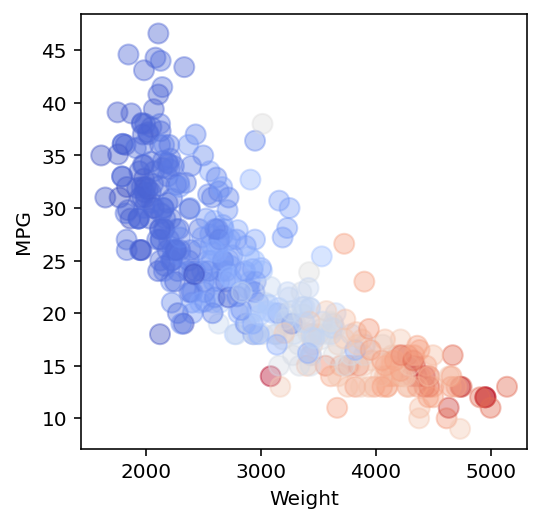

In [20]:
fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(df_cars['WGT'],df_cars['MPG'], color= color,alpha=.4, s=100)
ax.set_xlabel('Weight')
ax.set_ylabel('MPG')
plt.show()

We're going to change the size of the dots based off the cylinder. There are now four variables showing. Color = engine power, Size = cylinders, location = MPG and Weight

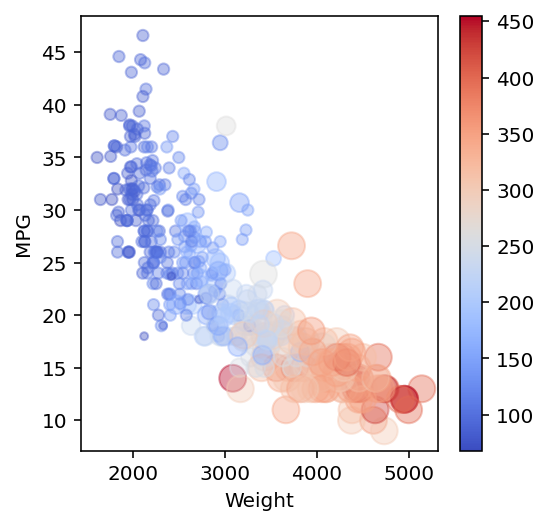

In [21]:
fig, ax = plt.subplots(figsize=(4,4))

cmap = plt.cm.coolwarm
p = ax.scatter(df_cars['WGT'],df_cars['MPG'],
           color= color,alpha=.4, s=df_cars['CYL']**2.5, cmap=color)

plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))

ax.set_xlabel('Weight')
ax.set_ylabel('MPG')
plt.show()

In [22]:
df_cars['ENG']

0      307.0
1      350.0
2      318.0
3      304.0
4      302.0
       ...  
387    140.0
388     97.0
389    135.0
390    120.0
391    119.0
Name: ENG, Length: 392, dtype: float64

## Histograms

In [33]:
def histo(ax,X, title, xlabel = 'X', ylabel = 'Frequency', color ='#FEE08F', highlight=None):
    n, bins, patches = ax.hist(df_cars['WGT'], color = color)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    for i, rect in enumerate(patches):
        if highlight is not None and i == highlight:
            rect.set_color('palevioletred')
        rect.set_linewidth(0.5)
        rect.set_edgecolor('grey')

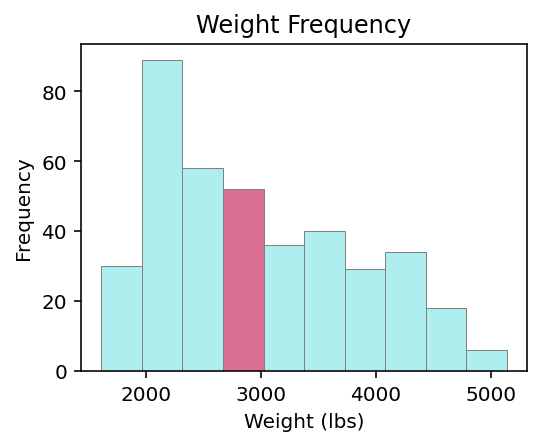

In [34]:
fig,ax = plt.subplots(figsize=(4,3))    
histo(ax, df_cars['WGT'], 'Weight Frequency','Weight (lbs)',color='paleturquoise', highlight = 3)
plt.show()

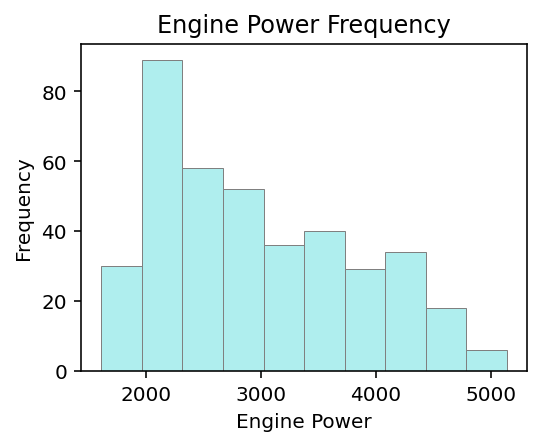

In [40]:
fig,ax = plt.subplots(figsize=(4,3))    
histo(ax, df_cars['ENG'],'Engine Power Frequency','Engine Power',color='paleturquoise')

plt.show()

## Line Stuff

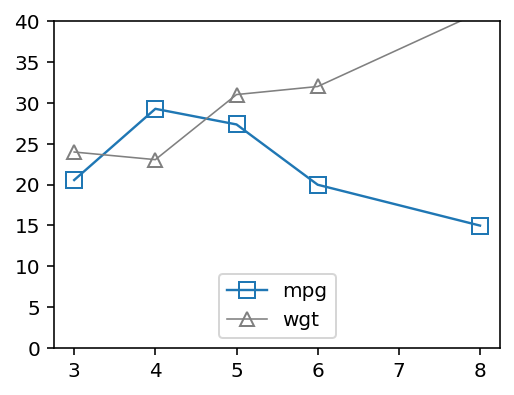

In [27]:
fig, ax = plt.subplots(figsize=(4,3))

ax.plot(cyl, avg_mpg,'s-', markersize=8, fillstyle = 'none', 
        label = 'mpg', lw=1.2)
ax.plot(cyl, avg_wgt/100, '^-', markersize = 7, fillstyle = 'none', 
        label = 'wgt', c = 'grey', lw=.8)
ax.set_ylim(0,40)
plt.legend(loc='lower center')
plt.show()

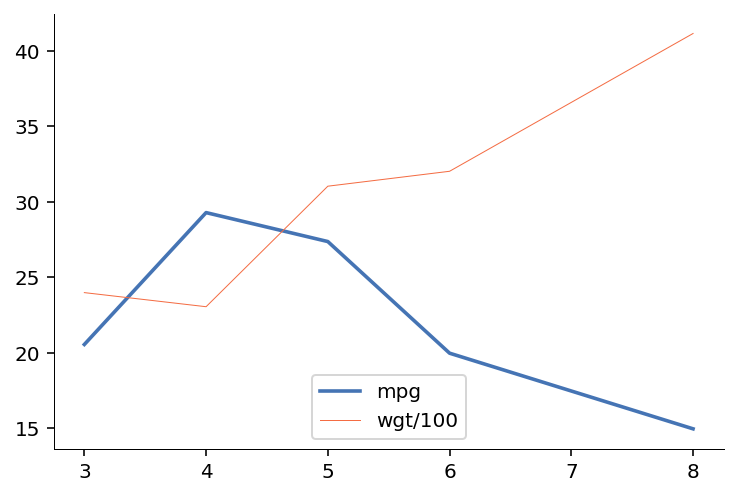

In [28]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(cyl, avg_mpg, lw=1.8, c='#4574B4', label = 'mpg')
ax.plot(cyl, avg_wgt/100, lw=0.5, c='#F46C43', label = 'wgt/100')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

plt.legend(loc='lower center')
plt.show()

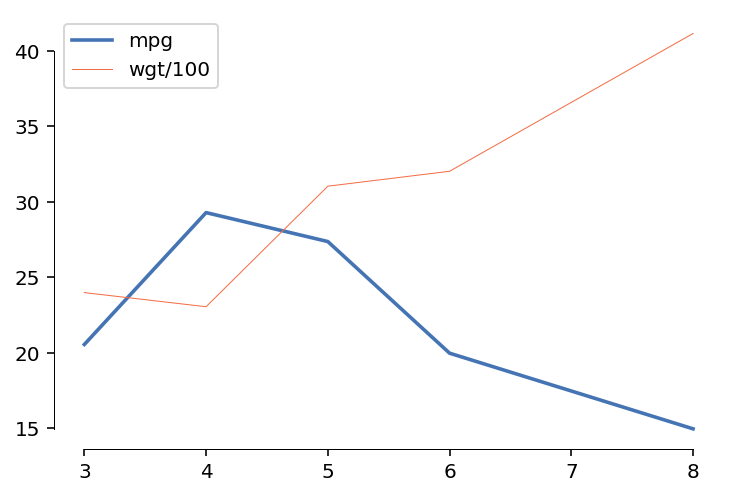

In [29]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(cyl, avg_mpg, lw=1.8, c='#4574B4', label = 'mpg')
ax.plot(cyl, avg_wgt/100, lw=0.5, c='#F46C43', label = 'wgt/100')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_bounds(3,8)
ax.spines['left'].set_bounds(min(avg_mpg),40)

plt.legend(loc='upper left')
plt.show()

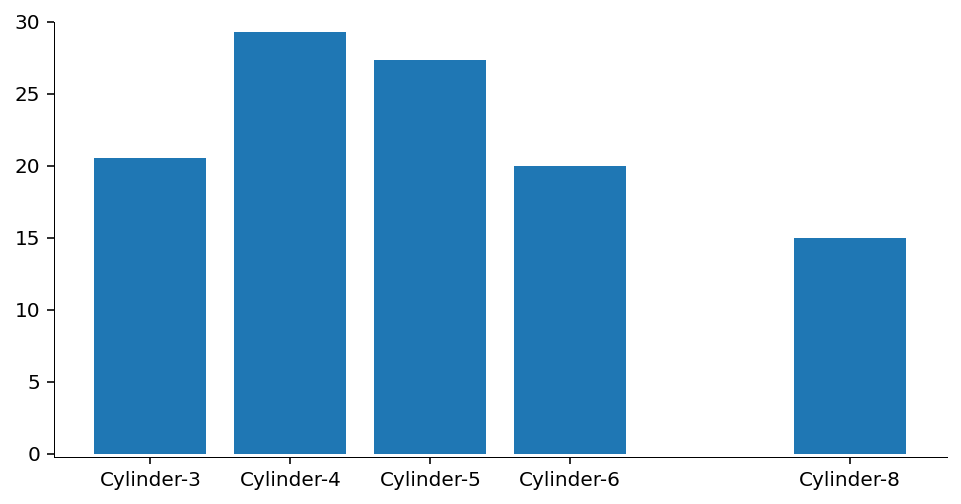

In [30]:
fig, ax = plt.subplots(figsize=(8,4))

ax.bar(cyl, avg_mpg)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

ax.set_xticks(cyl)
ax.set_xticklabels([f'Cylinder-{n}' for n in cyl])

ax.set_ylim(-0.2,30)

plt.show()

In [31]:
cyl_ = cyl[0:2]
avg_mpg_ = avg_mpg[0:2]

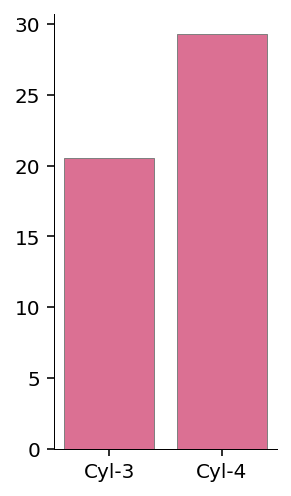

In [32]:
fig, ax = plt.subplots(figsize = (2,4))

barcontainers = ax.bar(cyl_, avg_mpg_, color = 'palevioletred')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)


for rect in barcontainers.patches:
    rect.set_linewidth(0.5)
    rect.set_edgecolor('grey')
    
ax.set_xticks(cyl_)
ax.set_xticklabels([f'Cyl-{n}' for n in cyl_])

plt.show()

In [49]:
high = np.array([ 337, 628,   722,  636,  649,  510,  351])
med  = np.array([ 969, 1950, 2077, 1886, 1905, 1479,  942])
low  = np.array([2866, 5643, 6425, 5521, 4897, 4845, 3179])

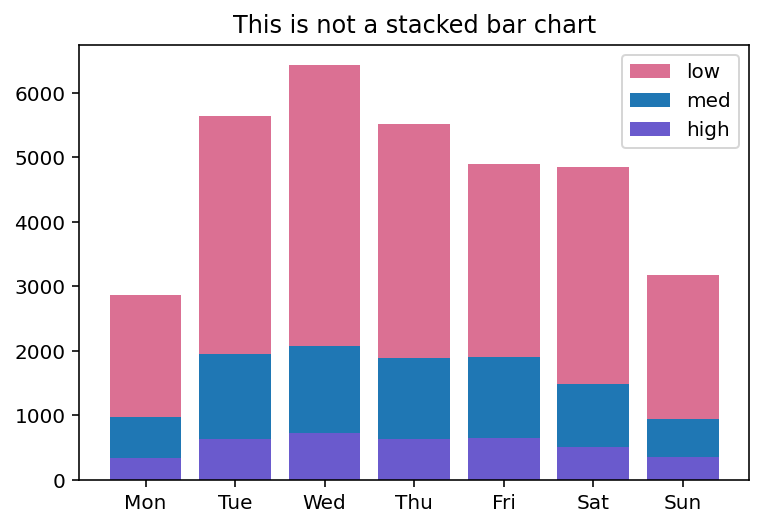

In [52]:
fig, ax = plt.subplots()
ax.bar(range(7), low, color ='palevioletred',label="low")
ax.bar(range(7),   med,  label="med")
ax.bar(range(7), high, color = 'slateblue', label="high")

ax.set_title('This is not a stacked bar chart')
ax.set_xticks(range(7))
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.legend() # use labels from bar() calls
plt.show()

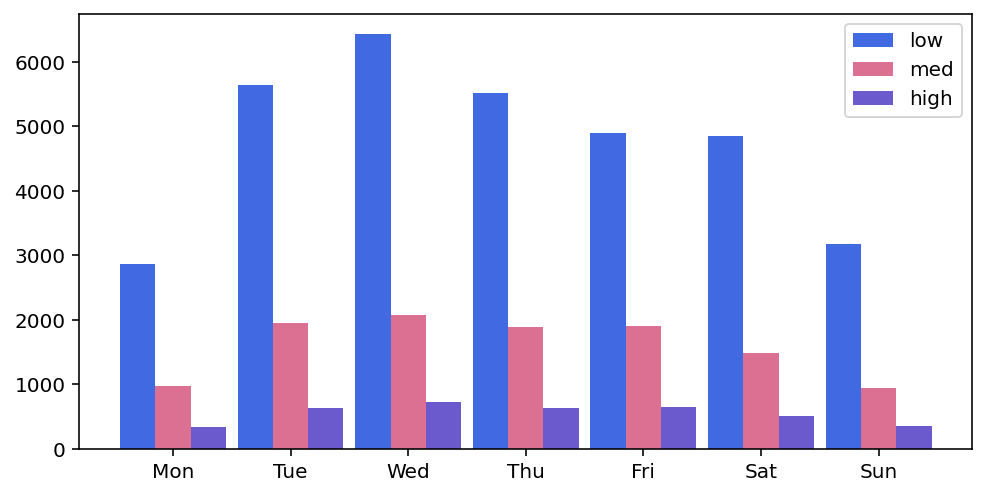

In [59]:
fig, ax = plt.subplots(figsize=(8,4))
w = .3
ax.bar(np.arange(7)-w, low, color='royalblue', width=w, label="low")
ax.bar(np.arange(7),   med,  width=w,color='palevioletred', label="med")
ax.bar(np.arange(7)+w, high, color='slateblue', width=w, label="high")

ax.set_xticks(np.arange(7))
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

plt.legend() 
plt.show()